In [2]:
#Importing Libraries
import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
#Importing the dataset
countries = pd.read_csv('C:/Users/divij/Downloads/Country-data.csv')
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
#Inspecting the data
countries.shape

(167, 10)

In [5]:
countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [14]:
#Creating a new df for outlier analysis
countries3 = countries
countries3

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840


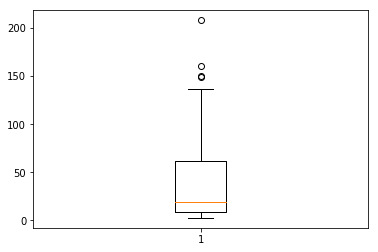

In [19]:
# outlier treatment for child mortality
plt.boxplot(countries3.child_mort)
Q1 = countries3.child_mort.quantile(0.25)
Q3 = countries3.child_mort.quantile(0.75)
IQR = Q3 - Q1
countries3 = countries3[(countries3.child_mort >= Q1 - 1.5*IQR) & (countries3.child_mort <= Q3 + 1.5*IQR)]

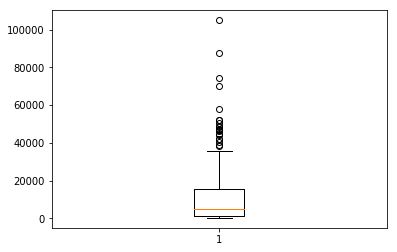

In [20]:
# outlier treatment for gdpp
plt.boxplot(countries3.gdpp)
Q1 = countries3.gdpp.quantile(0.25)
Q3 = countries3.gdpp.quantile(0.75)
IQR = Q3 - Q1
countries3 = countries3[(countries3.gdpp >= Q1 - 1.5*IQR) & (countries3.gdpp <= Q3 + 1.5*IQR)]

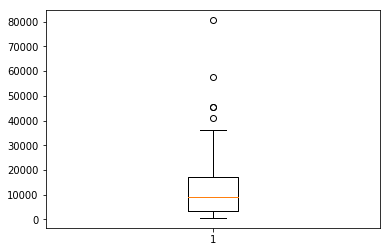

In [21]:
# outlier treatment for income
plt.boxplot(countries3.income)
Q1 = countries3.income.quantile(0.25)
Q3 = countries3.income.quantile(0.75)
IQR = Q3 - Q1
countries3 = countries3[(countries3.income >= Q1 - 1.5*IQR) & (countries3.income <= Q3 + 1.5*IQR)]

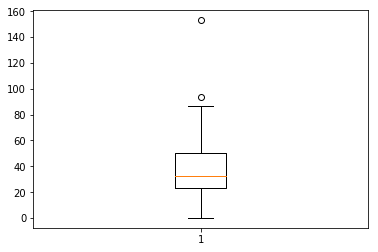

In [22]:
# outlier treatment for exports
plt.boxplot(countries3.exports)
Q1 = countries3.exports.quantile(0.25)
Q3 = countries3.exports.quantile(0.75)
IQR = Q3 - Q1
countries3 = countries3[(countries3.exports >= Q1 - 1.5*IQR) & (countries3.exports <= Q3 + 1.5*IQR)]

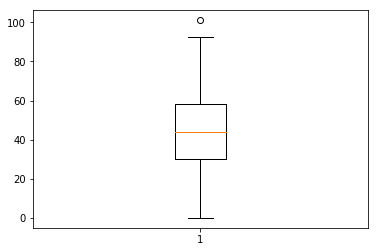

In [23]:
# outlier treatment for imports
plt.boxplot(countries3.imports)
Q1 = countries3.imports.quantile(0.25)
Q3 = countries3.imports.quantile(0.75)
IQR = Q3 - Q1
countries3 = countries3[(countries3.imports >= Q1 - 1.5*IQR) & (countries3.imports <= Q3 + 1.5*IQR)]

In [24]:
#Checking the new shape after removing outliers in the countries3 df
countries3.shape

(134, 10)

**Comment: I will not be removing outliers as I do not wish to lose any data**

In [6]:
#Scaling data for PCA
from sklearn.preprocessing import StandardScaler
countries_new = countries.drop("country", axis=1)

scaler = StandardScaler()

countries_new[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']] = scaler.fit_transform(countries2[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']])

countries_new.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [7]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [8]:
#Doing the PCA on the data
pca.fit(countries_new)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [9]:
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [10]:
colnames = list(countries_new.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,-0.419519,0.192884,child_mort
1,0.283897,0.613163,exports
2,0.150838,-0.243087,health
3,0.161482,0.671821,imports
4,0.398441,0.022536,income


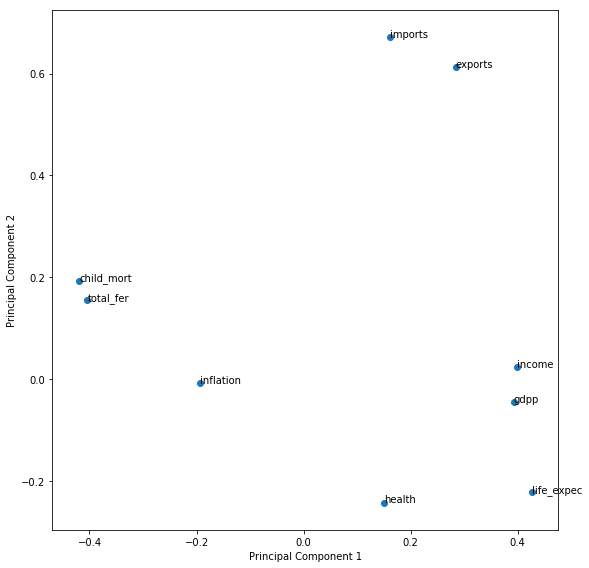

In [11]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

In [12]:
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

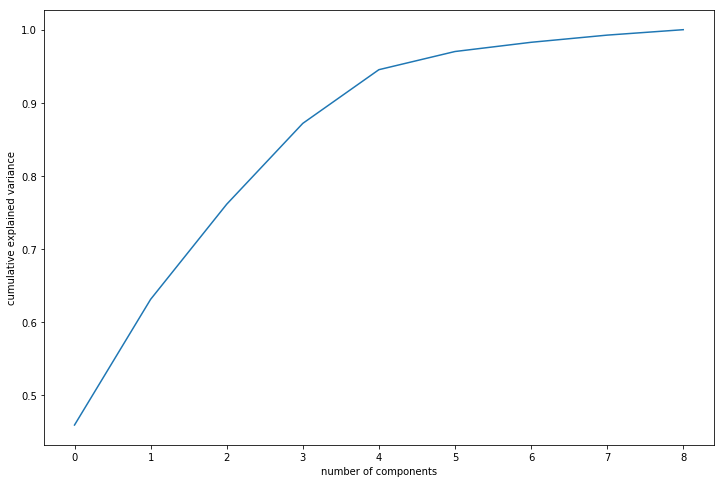

In [15]:
# Making screeplot to check variance of principal components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [16]:
#Using incremental PCA for efficiency
from sklearn.decomposition import IncrementalPCA
pca_2 = IncrementalPCA(n_components=4)

In [17]:
#Applying on dataset
countries_pca = pca_2.fit_transform(countries_new)
countries_pca.shape

(167, 4)

In [26]:
countries_pca

array([[-2.91378654e+00,  8.83538878e-02,  7.21003195e-01,
         9.96698978e-01],
       [ 4.29357566e-01, -5.87858991e-01,  3.21052324e-01,
        -1.17119280e+00],
       [-2.82988288e-01, -4.46657168e-01, -1.22513541e+00,
        -8.50127000e-01],
       [-2.93096861e+00,  1.69943654e+00, -1.52173450e+00,
         8.75966440e-01],
       [ 1.03198760e+00,  1.30488006e-01,  1.92922430e-01,
        -8.44808058e-01],
       [ 2.84700248e-02, -1.75672051e+00, -7.93519995e-01,
        -5.24863850e-02],
       [-1.02848921e-01, -5.67475881e-01, -2.77668852e-01,
        -1.45832104e+00],
       [ 2.33945555e+00, -1.99811958e+00, -2.37052010e-01,
         1.13249032e+00],
       [ 2.97385881e+00, -7.34849467e-01,  5.48420918e-01,
         1.19256083e+00],
       [-1.80005999e-01, -3.93752233e-01, -8.64255214e-01,
        -4.26656606e-01],
       [ 1.26607427e+00, -6.65087633e-01,  4.53533102e-01,
         5.94788468e-02],
       [ 1.67073708e+00,  5.60394035e-01, -1.02016832e+00,
      

In [19]:
corrmat = np.corrcoef(countries_pca.transpose())

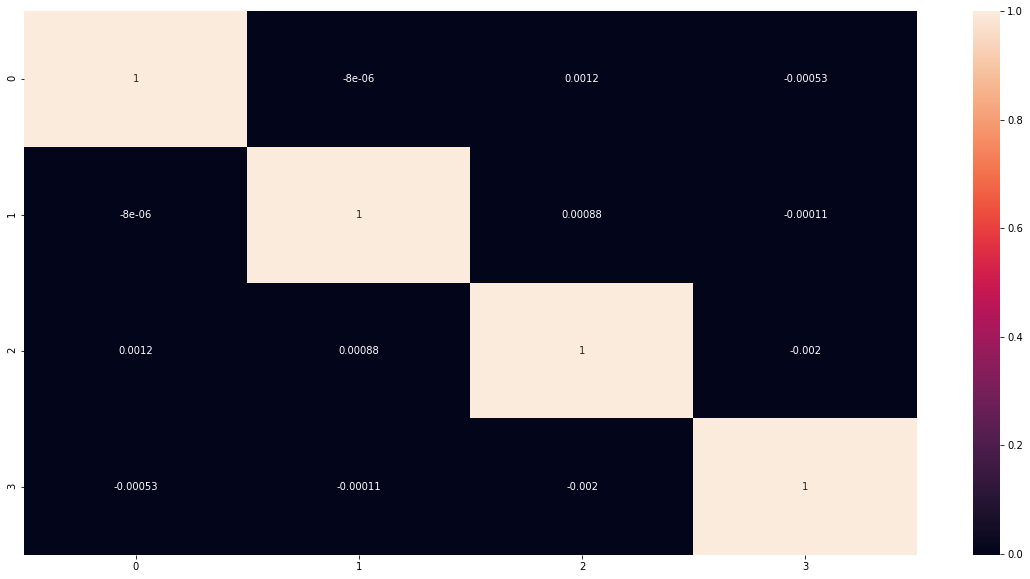

In [20]:
#Checking correlation
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [24]:
#Checking PCA on variables
colnames2 = list(countries_new.columns)
pcs2_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3],'Feature':colnames})
pcs2_df

,PC1,PC2,PC3,PC4,Feature
0,-0.419519,0.192884,-0.029544,0.370653,child_mort
1,0.283897,0.613163,0.144761,0.003091,exports
2,0.150838,-0.243087,-0.596632,0.461897,health
3,0.161482,0.671821,-0.299927,-0.071907,imports
4,0.398441,0.022536,0.301548,0.392159,income
5,-0.193173,-0.008404,0.642520,0.150442,inflation
6,0.425839,-0.222707,0.113919,-0.203797,life_expec
7,-0.403729,0.155233,0.019549,0.378304,total_fer
8,0.392645,-0.046022,0.122977,0.531995,gdpp


In [34]:
#Creating PCA dataset
countries_pca_df = pd.DataFrame(countries_pca)
countries_pca_df.columns = ['PC1', 'PC2', 'PC3','PC4']
countries_pca_df

,PC1,PC2,PC3,PC4
0,-2.913787,0.088354,0.721003,0.996699
1,0.429358,-0.587859,0.321052,-1.171193
2,-0.282988,-0.446657,-1.225135,-0.850127
3,-2.930969,1.699437,-1.521734,0.875966
4,1.031988,0.130488,0.192922,-0.844808
5,0.028470,-1.756721,-0.793520,-0.052486
6,-0.102849,-0.567476,-0.277669,-1.458321
7,2.339456,-1.998120,-0.237052,1.132490
8,2.973859,-0.734849,0.548421,1.192561
9,-0.180006,-0.393752,-0.864255,-0.426657


In [43]:
#Performing Hopkins statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [44]:
hopkins(countries_pca_df)

0.7833576598100493

In [35]:
#Performing K-means clustering by selecting 4 clusters
model_clus4 = KMeans(n_clusters = 4, max_iter=100)
model_clus4.fit(countries_pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [45]:
#Doing silhouette analysis
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(countries_pca_df)
    sse_.append([k, silhouette_score(countries_pca_df, kmeans.labels_)])

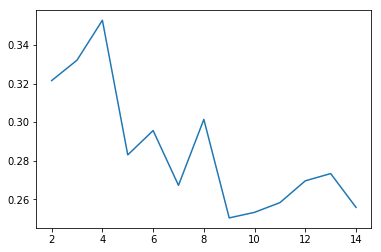

In [46]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

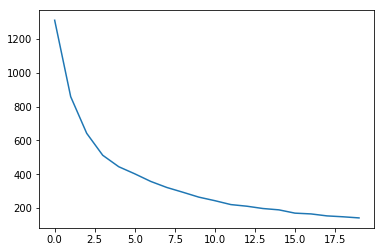

In [48]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(countries_pca_df)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

In [49]:
#Creating dataframe with cluster ID
countries.index = pd.RangeIndex(len(countries.index))
countries_km1 = pd.concat([countries, pd.Series(model_clus4.labels_)], axis=1)
countries_km1.columns = ['country', 'child_mort', 'exports','health','imports','income','inflation','life_expec','total_fer','gdpp','ClusterID']

In [50]:
countries_km1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [113]:
cluster_country_count = pd.DataFrame(countries_km1.groupby('ClusterID')['country'].count().sort_values(ascending = False))
cluster_country_count

,country
ClusterID,
0,86
1,47
2,31
3,3


In [114]:
#Clustering again with 3 clusters this time
model_clus3 = KMeans(n_clusters = 3, max_iter=100)
model_clus3.fit(countries_pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [115]:
countries.index = pd.RangeIndex(len(countries.index))
countries_km2 = pd.concat([countries, pd.Series(model_clus3.labels_)], axis=1)
countries_km2.columns = ['country', 'child_mort', 'exports','health','imports','income','inflation','life_expec','total_fer','gdpp','ClusterID']

In [116]:
countries_km2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,2
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,2
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,2
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,2
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,2
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,2


In [171]:
cluster_country_count2 = pd.DataFrame(countries_km2.groupby('ClusterID')['country'].count())
cluster_country_count2

,country
ClusterID,
0,36
1,47
2,84


In [119]:
#Making a Dataframe with the means of each variable for further anaylisis
km_clusters_child_mort = 	pd.DataFrame(countries_km2.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(countries_km2.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(countries_km2.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(countries_km2.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(countries_km2.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(countries_km2.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(countries_km2.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(countries_km2.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(countries_km2.groupby(["ClusterID"]).gdpp.mean())

In [120]:
df_mean = pd.concat([pd.Series([0,1,2]), km_clusters_child_mort, km_clusters_exports, km_clusters_health, km_clusters_imports, km_clusters_income, km_clusters_inflation, km_clusters_life_expec, km_clusters_total_fer, km_clusters_gdpp], axis=1)
df_mean.columns = ["ClusterID","child_mort_mean", "exports_mean", "health_mean", "imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df_mean.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444
1,1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,2,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381


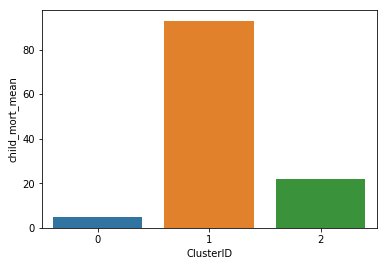

In [121]:
sns.barplot(x=df_mean.ClusterID, y=df_mean.child_mort_mean)

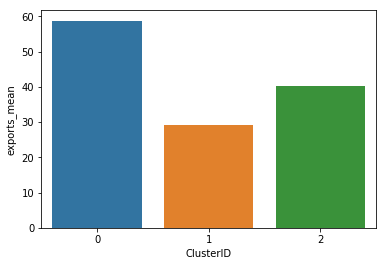

In [122]:
sns.barplot(x=df_mean.ClusterID, y=df_mean.exports_mean)

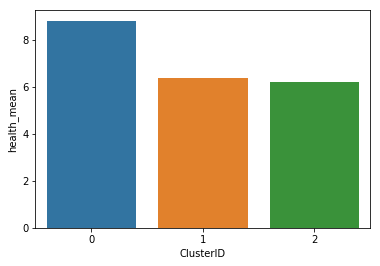

In [123]:
sns.barplot(x=df_mean.ClusterID, y=df_mean.health_mean)

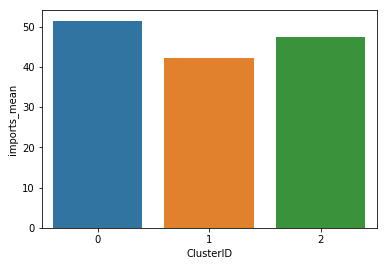

In [124]:
sns.barplot(x=df_mean.ClusterID, y=df_mean.imports_mean)

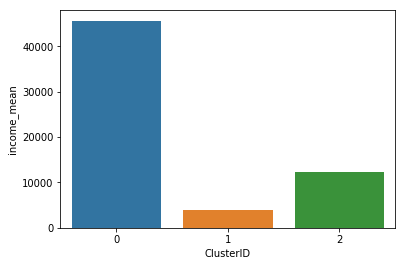

In [125]:
sns.barplot(x=df_mean.ClusterID, y=df_mean.income_mean)

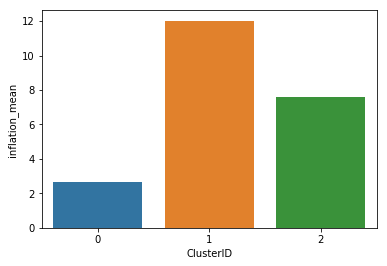

In [126]:
sns.barplot(x=df_mean.ClusterID, y=df_mean.inflation_mean)

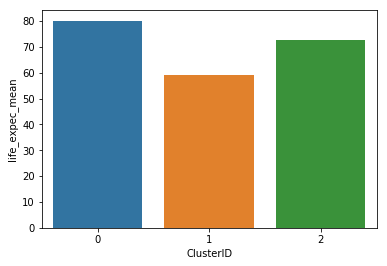

In [127]:
sns.barplot(x=df_mean.ClusterID, y=df_mean.life_expec_mean)

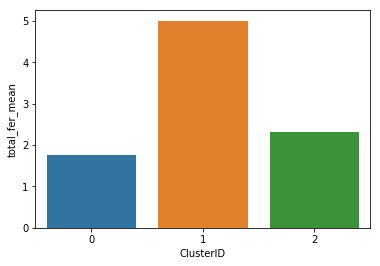

In [128]:
sns.barplot(x=df_mean.ClusterID, y=df_mean.total_fer_mean)

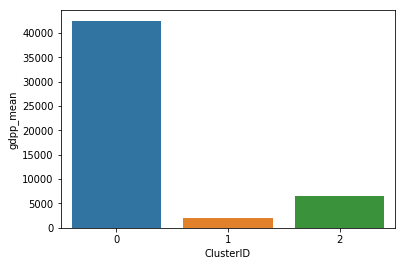

In [129]:
sns.barplot(x=df_mean.ClusterID, y=df_mean.gdpp_mean)

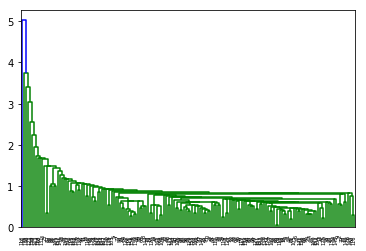

In [67]:
# heirarchical clustering
mergings = linkage(countries_pca_df, method = "single", metric='euclidean')
dendrogram(mergings,color_threshold = 4)
plt.show()

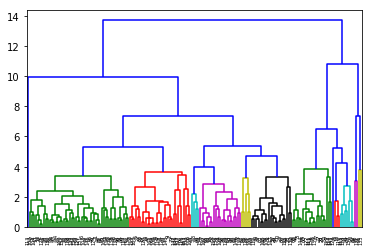

In [68]:
#Making dendogram for heirarchal clustering
mergings = linkage(countries_pca_df, method = "complete", metric='euclidean')
dendrogram(mergings, color_threshold = 4)
plt.show()

In [87]:
#Performing heirarchal clustering with 3 clusters
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
countries_hc = pd.concat([countries, clusterCut], axis=1)
countries_hc.columns = ["country","child_mort", "exports", "health", "imports","income","inflation","life_expec","total_fer","gdpp","ClusterID"]

In [88]:
#Making dataframe with cluster id
countries_hc

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900,1
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [130]:
cluster_country_count3 = pd.DataFrame(countries_hc.groupby('ClusterID')['country'].count().sort_values(ascending = False))
cluster_country_count3

,country
ClusterID,
0,132
1,31
2,4


In [131]:
#Performing heirarchal clustering with 2 clusters
clusterCut2 = pd.Series(cut_tree(mergings, n_clusters = 2).reshape(-1,))
countries_hc2 = pd.concat([countries, clusterCut2], axis=1)
countries_hc2.columns = ["country","child_mort", "exports", "health", "imports","income","inflation","life_expec","total_fer","gdpp","ClusterID"]

In [132]:
countries_hc2

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.80,8.73,20.9,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,51.30,11.00,47.8,43200,0.873,80.5,1.44,46900,1
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,0


In [133]:
cluster_country_count4 = pd.DataFrame(countries_hc2.groupby('ClusterID')['country'].count().sort_values(ascending = False))
cluster_country_count4

,country
ClusterID,
0,132
1,35


In [136]:
hc_clusters_child_mort = 	pd.DataFrame(countries_hc2.groupby(["ClusterID"]).child_mort.mean())
hc_clusters_exports = 	pd.DataFrame(countries_hc2.groupby(["ClusterID"]).exports.mean())
hc_clusters_health = 	pd.DataFrame(countries_hc2.groupby(["ClusterID"]).health.mean())
hc_clusters_imports = 	pd.DataFrame(countries_hc2.groupby(["ClusterID"]).imports.mean())
hc_clusters_income = 	pd.DataFrame(countries_hc2.groupby(["ClusterID"]).income.mean())
hc_clusters_inflation = 	pd.DataFrame(countries_hc2.groupby(["ClusterID"]).inflation.mean())
hc_clusters_life_expec = 	pd.DataFrame(countries_hc2.groupby(["ClusterID"]).life_expec.mean())
hc_clusters_total_fer = 	pd.DataFrame(countries_hc2.groupby(["ClusterID"]).total_fer.mean())
hc_clusters_gdpp = 	pd.DataFrame(countries_hc2.groupby(["ClusterID"]).gdpp.mean())

In [137]:
df_mean2 = pd.concat([pd.Series([0,1]), hc_clusters_child_mort, hc_clusters_exports, hc_clusters_health, hc_clusters_imports, hc_clusters_income, hc_clusters_inflation, hc_clusters_life_expec, hc_clusters_total_fer, hc_clusters_gdpp], axis=1)
df_mean2.columns = ["ClusterID","child_mort_mean", "exports_mean", "health_mean", "imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df_mean2.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,46.772727,36.228023,6.407424,45.908833,9278.507576,8.817038,68.106061,3.226742,5200.106061
1,1,6.202857,59.517143,8.355429,50.591429,46811.428571,3.877629,79.794286,1.896571,42245.714286


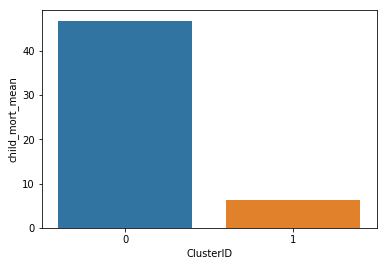

In [138]:
sns.barplot(x=df_mean2.ClusterID, y=df_mean2.child_mort_mean)

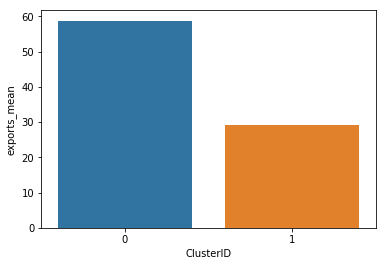

In [140]:
sns.barplot(x=df_mean2.ClusterID, y=df_mean.exports_mean)

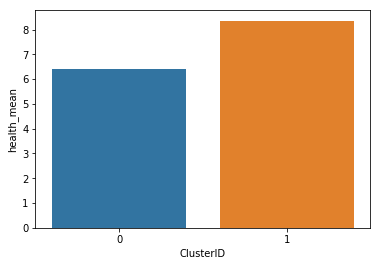

In [141]:
sns.barplot(x=df_mean2.ClusterID, y=df_mean2.health_mean)

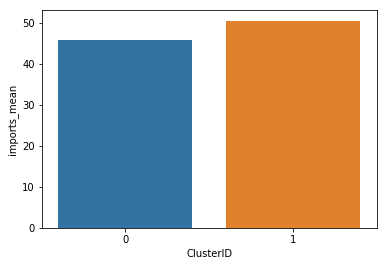

In [142]:
sns.barplot(x=df_mean2.ClusterID, y=df_mean2.imports_mean)

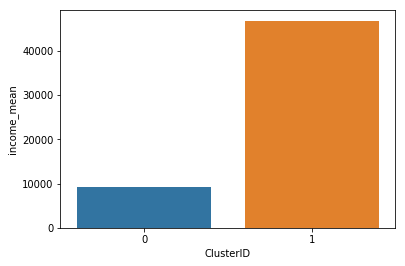

In [143]:
sns.barplot(x=df_mean2.ClusterID, y=df_mean2.income_mean)

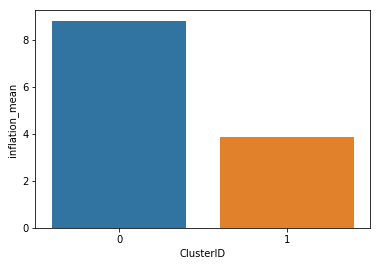

In [144]:
sns.barplot(x=df_mean2.ClusterID, y=df_mean2.inflation_mean)

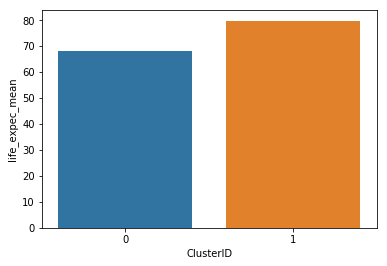

In [145]:
sns.barplot(x=df_mean2.ClusterID, y=df_mean2.life_expec_mean)

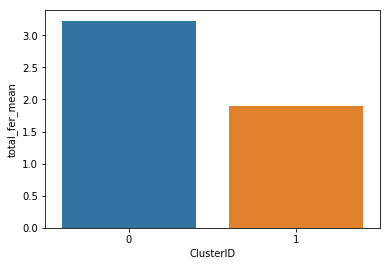

In [146]:
sns.barplot(x=df_mean2.ClusterID, y=df_mean2.total_fer_mean)

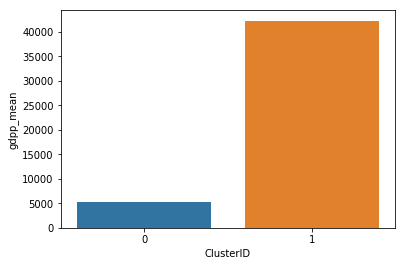

In [147]:
sns.barplot(x=df_mean2.ClusterID, y=df_mean2.gdpp_mean)

In [164]:
#Identifying top 5 countries which need aid
Under_Developed_km = countries_km2.loc[countries_km2['ClusterID'] == 1, :]
Under_Developed_km

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1


In [155]:
Under_developed_km.shape

(47, 11)

In [153]:
Undeveloped_hc = countries_hc2.loc[countries_hc2['ClusterID'] == 0, :]
Undeveloped_hc

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,28.00,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.40,4.17,31.4,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.90,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.80,4.40,45.3,6700,7.770,73.3,1.69,3220,0
9,Azerbaijan,39.2,54.30,5.88,20.7,16000,13.800,69.1,1.92,5840,0
10,Bahamas,13.8,35.00,7.89,43.7,22900,-0.393,73.8,1.86,28000,0
12,Bangladesh,49.4,16.00,3.52,21.8,2440,7.140,70.4,2.33,758,0


In [156]:
Undeveloped_hc.shape

(132, 11)

In [154]:
Under_Developed_km['country'].isin(Undeveloped_hc['country']).value_counts()

True    47
Name: country, dtype: int64

In [165]:
Under_Developed_km

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,1
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,1


In [169]:
#Selecting countries
Selected_Countries = Under_Developed_km.loc[[17, 26, 31, 37, 66]]
Selected_Countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,1
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662,1


In [170]:
from IPython.display import FileLink, FileLinks
Selected_Countries.to_csv("C:/Users/divij/Downloads/selected_countries.csv", sep=',', index = False)

In [135]:
from IPython.display import FileLink, FileLinks
countries_km2.to_csv("C:/Users/divij/Downloads/countykm.csv", sep=',', index = False)

In [110]:
from IPython.display import FileLink, FileLinks
countries_hc2.to_csv("C:/Users/divij/Downloads/countyhcc2.csv", sep=',', index = False)